<a href="https://colab.research.google.com/github/bridgetbangert/stock-market-predictions/blob/main/Basic_Metrics_and_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: Put in a stock and forecast the risk and the return after X amount of time.

# Stock Analysis

Following [this guide](https://nextjournal.com/hisham/stock-market).

In [ ]:
import pandas as pd
import numpy as np
import statsmodels
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import yfinance as yf

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

AAPL = yf.download('AAPL', start='2020-01-01')
GOOG = yf.download('GOOG', start='2020-01-01')
AMZN = yf.download('AMZN', start='2020-01-01')
MSFT = yf.download('MSFT', start='2020-01-01')

tech_list = [AAPL, GOOG, AMZN, MSFT]

for stock in tech_list:
    stock["Date"] = stock.index.date
for stock in tech_list:
    stock.set_index("Date", drop=True, inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1318.000000,1318.000000,1318.000000,1318.000000,1.318000e+03
mean,155.791578,157.378593,154.028702,155.640211,8.886165e+07
std,44.366124,44.590626,44.066990,44.323469,5.273101e+07
min,54.449886,55.452152,51.595983,55.350227,2.323470e+07
25%,128.141228,129.530642,126.648803,128.232882,5.413160e+07
50%,153.729614,155.264717,151.434986,153.090344,7.481720e+07
75%,181.853836,183.605892,180.443168,181.689585,1.054047e+08
max,258.735504,259.814335,257.347047,257.906429,4.265100e+08


# Basic analysis for multiple stocks

In [ ]:
stocks = ['AAPL','GOOG','MSFT','AMZN']
closing_df = yf.download(stocks,start,end)['Close']

# change the timestamp to date
closing_df["Date"] = closing_df.index.date
closing_df.set_index("Date", drop=True, inplace=True)

[*********************100%***********************]  4 of 4 completed


## Closing Prices

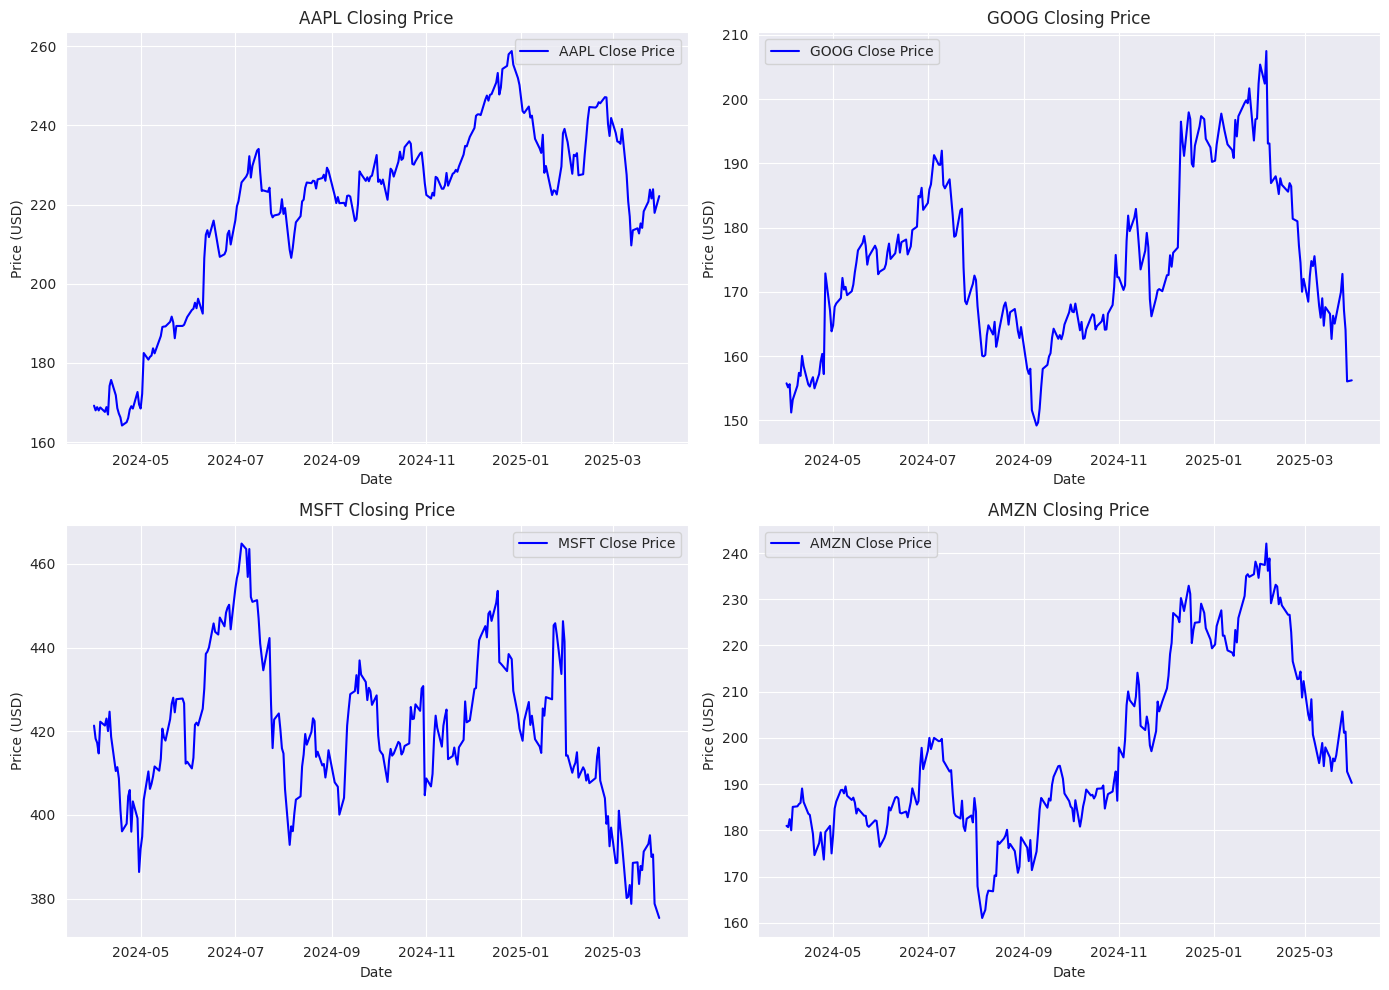

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, stock in enumerate(stocks):
    axs[i].plot(closing_df[stock], label=f'{stock} Close Price', color='blue')
    axs[i].set_title(f'{stock} Closing Price')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price (USD)')
    axs[i].legend()

plt.tight_layout()
plt.show()

## Rolling Averages

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


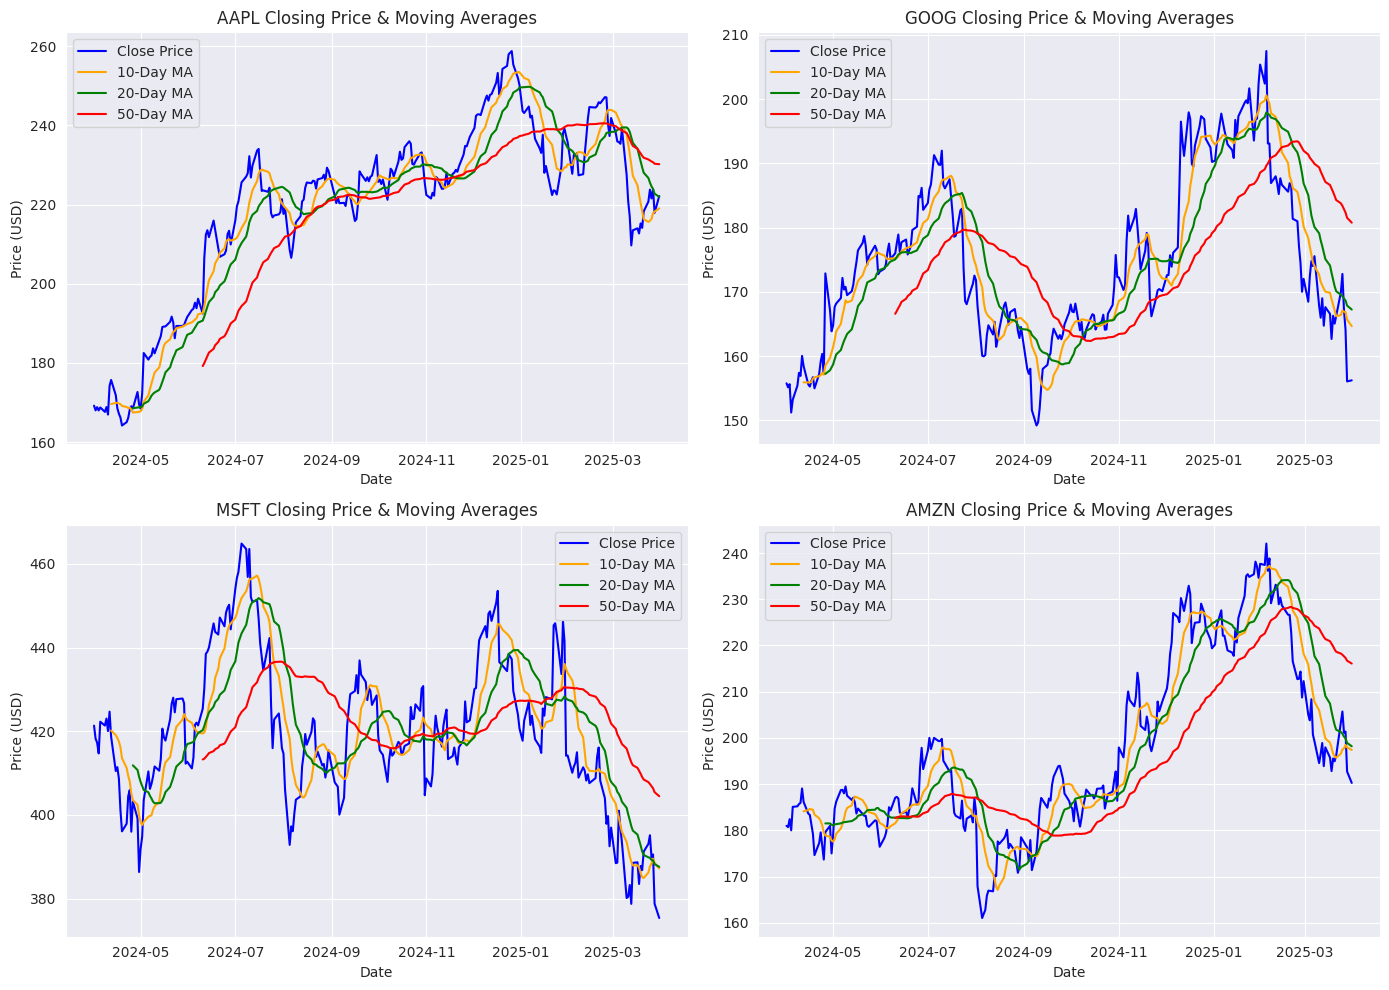

In [ ]:
for ticker in tickers:
    df = yf.download(ticker, period="1y")
    df['10days MA'] = df['Close'].rolling(10).mean()
    df['20days MA'] = df['Close'].rolling(20).mean()
    df['50days MA'] = df['Close'].rolling(50).mean()
    data[ticker] = df

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, ticker in enumerate(tickers):
    ax = axs[i // 2, i % 2]
    df = data[ticker]

    sns.lineplot(x=df.index, y=df["Close"].squeeze(), ax=ax, color="blue", label="Close Price")
    sns.lineplot(x=df.index, y=df["10days MA"].squeeze(), ax=ax, color="orange", label="10-Day MA")
    sns.lineplot(x=df.index, y=df["20days MA"].squeeze(), ax=ax, color="green", label="20-Day MA")
    sns.lineplot(x=df.index, y=df["50days MA"].squeeze(), ax=ax, color="red", label="50-Day MA")

    ax.set_title(f"{ticker} Closing Price & Moving Averages")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price (USD)")
    ax.legend()

plt.tight_layout()
plt.show()

## Daily Returns

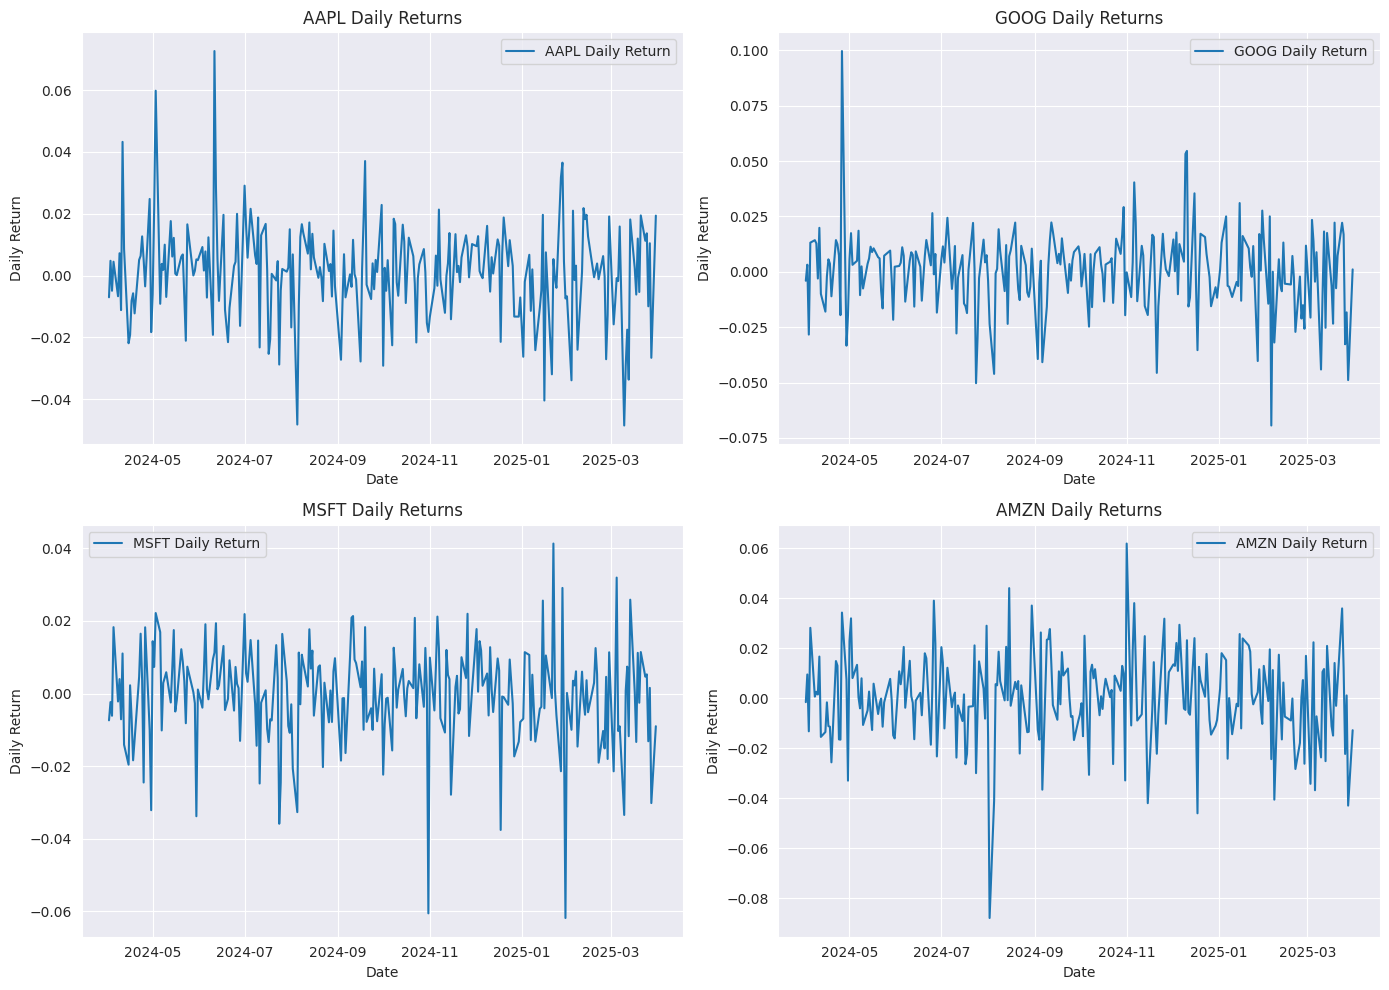

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes = axes.flatten()

for i, ticker in enumerate(tickers):
    daily_return = closing_df[ticker].pct_change().dropna()
    sns.lineplot(x=daily_return.index, y=daily_return.squeeze(), ax=axes[i], label=f"{ticker} Daily Return")

    axes[i].set_title(f"{ticker} Daily Returns")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Daily Return")
    axes[i].legend()

plt.tight_layout()
plt.show()

## Comparing Distributions of Daily Returns

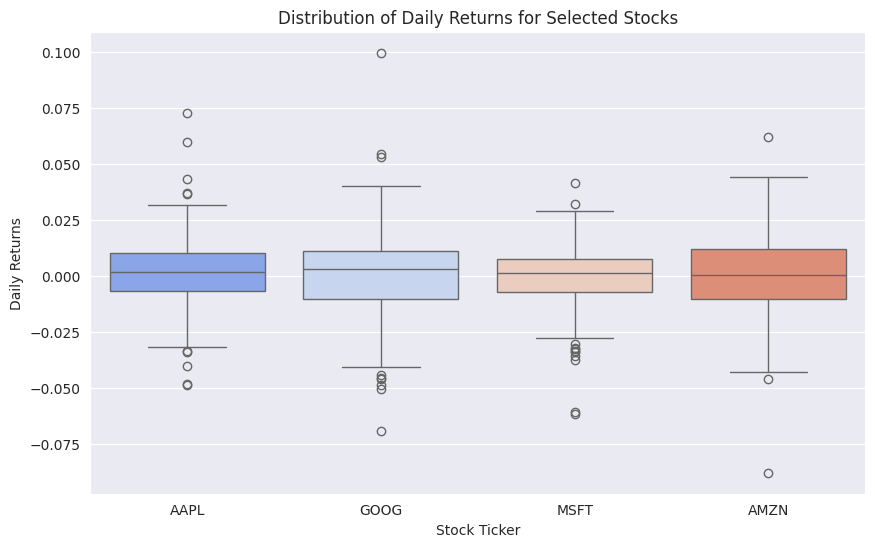

In [ ]:
closing_prices = pd.DataFrame({ticker: closing_df[ticker].pct_change() for ticker in tickers})
closing_prices_melted = closing_prices.melt(var_name="Ticker", value_name="Daily Returns")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Ticker", y="Daily Returns", data=closing_prices_melted, palette="coolwarm")

plt.title("Distribution of Daily Returns for Selected Stocks")
plt.xlabel("Stock Ticker")
plt.ylabel("Daily Returns")

plt.show()

## Checking for correlation between stocks

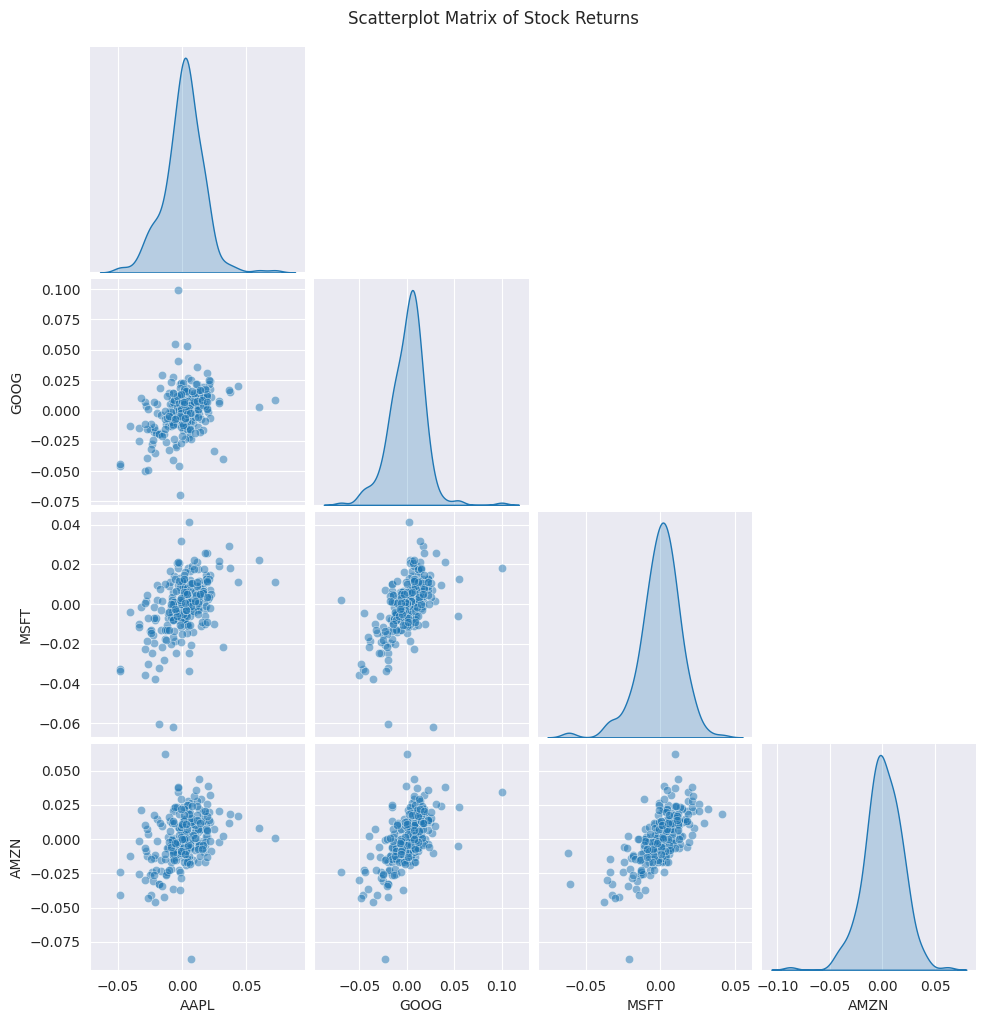

In [ ]:
returns = pd.DataFrame({ticker: closing_df[ticker].pct_change() for ticker in tickers})
returns.dropna(inplace=True)

sns.pairplot(returns, diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})

plt.suptitle("Scatterplot Matrix of Stock Returns", y=1.02)

plt.show()